# **Capitulo 2 Problema 1**

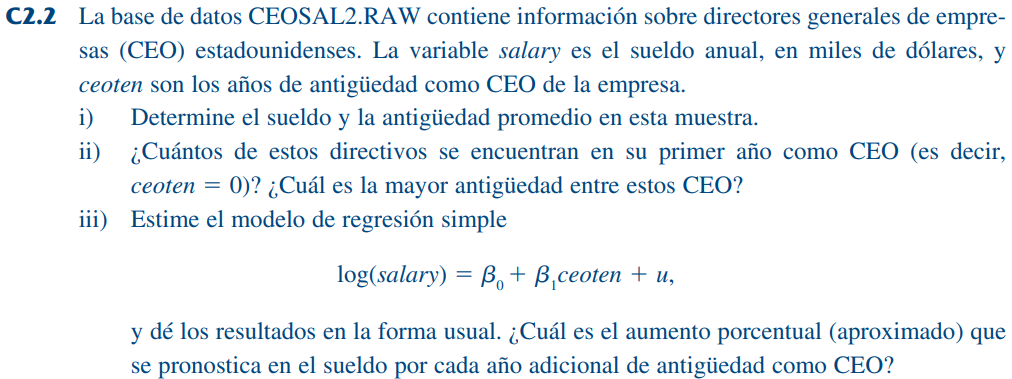

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from wooldridge import data as wd

In [3]:
# Cargar la base de datos CEOSAL2
data = wd('ceosal2')

# i) Calcular sueldo y antigüedad promedio
salary_mean = data['salary'].mean()
ceoten_mean = data['ceoten'].mean()

print(f"Sueldo promedio (en miles de dólares): {salary_mean:.2f}")
print(f"Antigüedad promedio como CEO (en años): {ceoten_mean:.2f}")

Sueldo promedio (en miles de dólares): 865.86
Antigüedad promedio como CEO (en años): 7.95


In [4]:
# ii) CEOs en su primer año y mayor antigüedad
ceos_first_year = data[data['ceoten'] == 0].shape[0]
max_ceoten = data['ceoten'].max()

print(f"Número de CEOs en su primer año: {ceos_first_year}")
print(f"Mayor antigüedad entre los CEOs: {max_ceoten} años")

Número de CEOs en su primer año: 5
Mayor antigüedad entre los CEOs: 37 años


In [5]:
# iii) Modelo de regresión log(salary) = β0 + β1*ceoten + u
data['log_salary'] = np.log(data['salary'])  # Transformar salario a logaritmo
X = sm.add_constant(data['ceoten'])  # Agregar término constante
y = data['log_salary']

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Resultados del modelo
print(model.summary())

# Coeficiente de ceoten
coef_ceoten = model.params['ceoten']

# Interpretación: aumento porcentual por año adicional
percent_increase = coef_ceoten * 100  # Multiplicar por 100 para obtener el porcentaje
print(f"Aumento porcentual aproximado en el sueldo por cada año adicional como CEO: {percent_increase:.2f}%")

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.334
Date:                Tue, 07 Jan 2025   Prob (F-statistic):              0.128
Time:                        07:46:13   Log-Likelihood:                -160.84
No. Observations:                 177   AIC:                             325.7
Df Residuals:                     175   BIC:                             332.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5055      0.068     95.682      0.0